# Project for submission 

## AI usage

I usually don't use AI for coding and try to instead find my own solutions and search for example stack overflow or the code documentation. I found it necessary, however, to use AI to solve my problems with `LineChartColumn()`. 

## Log 

I really liked working on this assignment, although the part on `LineChartColumn()` brought me suffering. I have tried to use the jupyter notebook for trying out slicing and plotting, to more easily see the results of my plans. 

On the notebook: I though that the best way to graph all variables together would be by log-transforming them. Seeing the result, I don't necessarily think that is the best option, but I chose to focus more on the app in this assigment. 

For page 2: I struggled quite a while with figuring out how to use `LineChartColumn()`. I didn't feel like I found valuable hints in the documentation and so I had to ask AI, Microsoft Copilot, for an example on how to use the function. After working on the example for a while it got clearer, but I had a hard time converting the dataframe to a format that I could use with this function.

For page 3: I tried different plotting libraries for a while before finding a good source on using `plotly` with streamlit. After following his examples, I found this library to be the easiest to follow. 

## Links

- Github: https://github.com/Satheris/IND320_SMAA
- Streamlit app: https://ind320smaa-2eg32uba6uhmrknkwtxzar.streamlit.app/

## Coding

### Imports

In [1]:
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import numpy as np

### Reading data 

In [2]:
df = pd.read_csv('data/open-meteo-subset.csv')
df

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284
...,...,...,...,...,...,...
8755,2020-12-30T19:00,-6.5,0.0,1.6,4.0,58
8756,2020-12-30T20:00,-7.0,0.0,1.2,3.4,50
8757,2020-12-30T21:00,-7.5,0.0,1.1,2.4,22
8758,2020-12-30T22:00,-7.2,0.0,0.6,1.6,22


### Plotting data

In [3]:
df.describe()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


<Axes: title={'center': 'Precipitation (mm)'}>

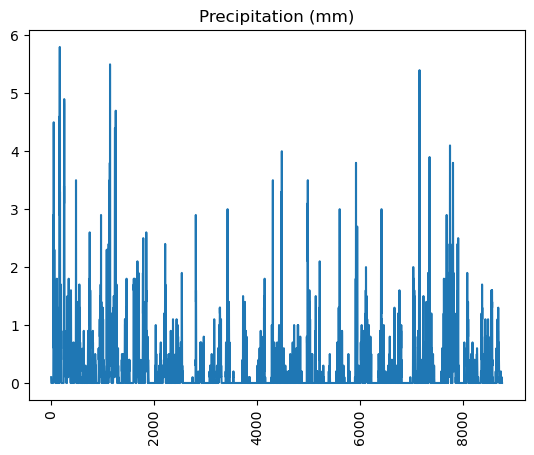

In [4]:
df['precipitation (mm)'].plot(title='Precipitation (mm)', x=df['time'], rot=90)

<Axes: title={'center': 'Temperature'}>

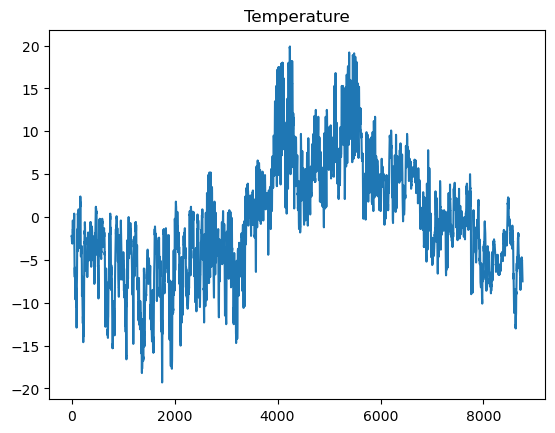

In [5]:
df['temperature_2m (°C)'].plot(title='Temperature')

<Axes: title={'center': 'Wind direction'}>

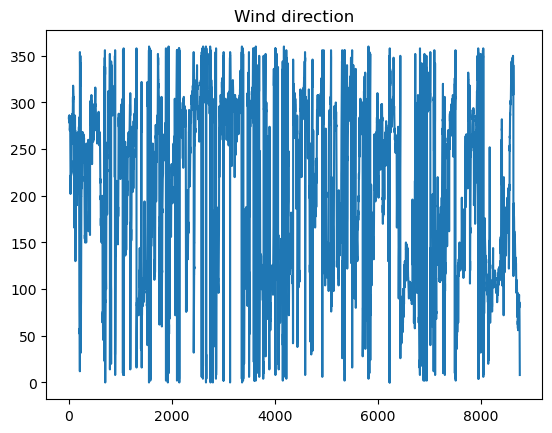

In [6]:
df['wind_direction_10m (°)'].plot(title='Wind direction')

<Axes: title={'center': 'Wind gusts'}>

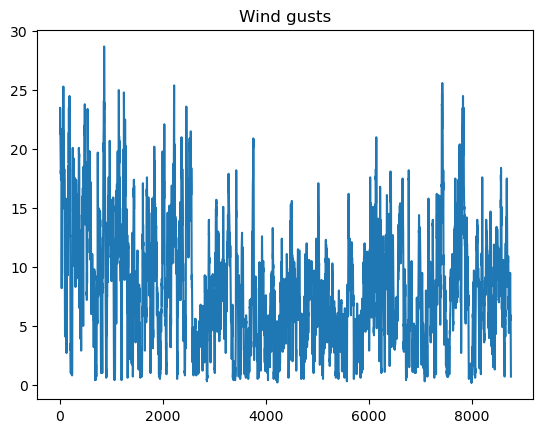

In [7]:
df['wind_gusts_10m (m/s)'].plot(title='Wind gusts')

<Axes: title={'center': 'Wind speed'}>

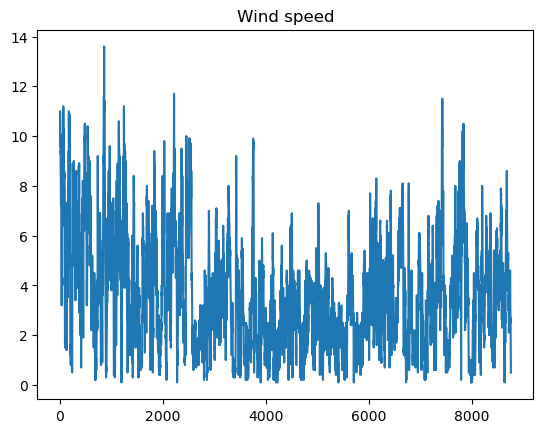

In [8]:
df['wind_speed_10m (m/s)'].plot(title='Wind speed')

<Axes: xlabel='time'>

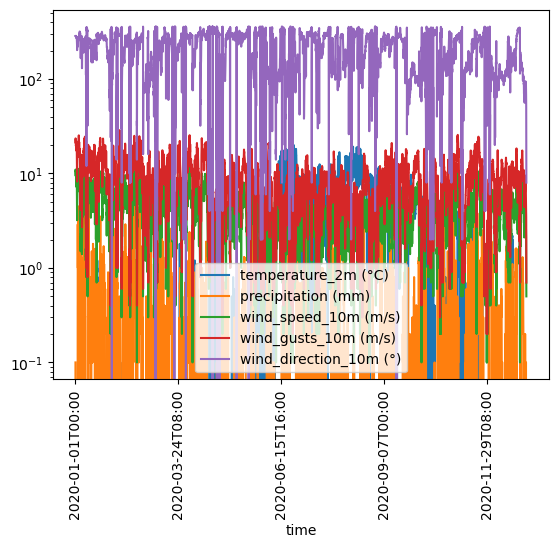

In [9]:
df.plot(x='time', rot=90, logy=True)

### Testing for streamlit app

In [10]:
df2 = df[(df['time'] >= '2020-01-01T00:00') & (df['time'] < '2020-02-01T00:00')]
categories = list(df.columns[1:])
df2 = df2.transpose().drop('time')
df2

chart_df = pd.DataFrame({
    "Variable": [
        "temperature (°C)",
        "precipitation (mm)",
        "wind speed 10m (m/s)",
        "wind gusts 10m (m/s)",
        "wind direction 10m (°)"
    ],
    "Values": [
        df["temperature_2m (°C)"].tolist(),
        df["precipitation (mm)"].tolist(),
        df["wind_speed_10m (m/s)"].tolist(),
        df["wind_gusts_10m (m/s)"].tolist(),
        df["wind_direction_10m (°)"].tolist()
    ]
})

chart_df

,Variable,Values
0,temperature (°C),"[-2.2, -2.2, -2.3, -2.3, -2.7, -2.8, -2.8, -2...."
1,precipitation (mm),"[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,wind speed 10m (m/s),"[9.6, 10.6, 11.0, 10.6, 10.6, 10.3, 9.6, 9.7, ..."
3,wind gusts 10m (m/s),"[21.3, 23.0, 23.5, 23.3, 22.8, 22.6, 21.8, 20...."
4,wind direction 10m (°),"[284, 282, 284, 284, 284, 286, 286, 284, 284, ..."


In [11]:
df['time'] = pd.to_datetime(df['time'])
df[df['time'] == '2020-03-01']

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
1440,2020-03-01,-9.6,0.2,7.3,15.5,86
